# Rețele neuronale feedforward

Importuri necesare

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

XOR

In [67]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(4,)
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu')
mlp.fit(X, y)
mlp.coefs_ = [np.array([[ -1.0 ,  1.0], [1.0, -1.0]]), np.array([[1.0],[1.0]])]
mlp.intercepts_ = [np.array([-0.5, -0.5]), np.array([0.0])]
y_pred=mlp.predict(X)                     
print(y_pred)

[0 1 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Suprafata de decizie

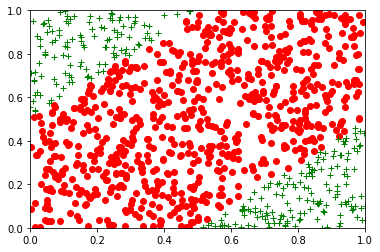

In [61]:
points = np.random.rand(1000,2)
labels = mlp.predict(points)
plt.ylim((0, 1))    
plt.xlim((0, 1))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()

In [62]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',solver='lbfgs',alpha=0.001, max_iter=10000)
mlp2.fit(X, y)                   
y_pred=mlp2.predict(X)            
print(y_pred)

[0 1 1 0]


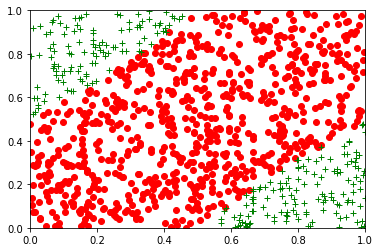

In [63]:
points = np.random.rand(1000,2)
labels = mlp2.predict(points)
plt.ylim((0, 1))    
plt.xlim((0, 1))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()
